# Contents

1. Data Exploration 
2. Feature Engineering

   2.1 Split the Data

   2.2 Transform Features

   2.3 Oversampling (SMOTE)

3. Modeling and Evaluation

   3.1 Training Model

   3.2 Tunning Hyperparameters

   3.3 Evaluation

4. Feature Importance Analysis

## Part 0: Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('bank_churn.csv')

## Part 1: Data Exploration

In [7]:
df.describe()

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.00000,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2499.75000,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,4999.50000,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7499.25000,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,9999.00000,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   Surname          10000 non-null  object 
 4   CreditScore      10000 non-null  int64  
 5   Geography        10000 non-null  object 
 6   Gender           10000 non-null  object 
 7   Age              10000 non-null  int64  
 8   Tenure           10000 non-null  int64  
 9   Balance          10000 non-null  float64
 10  NumOfProducts    10000 non-null  int64  
 11  HasCrCard        10000 non-null  int64  
 12  IsActiveMember   10000 non-null  int64  
 13  EstimatedSalary  10000 non-null  float64
 14  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [9]:
df.nunique()

Unnamed: 0         10000
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0         0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Check target variable
y = df['Exited']

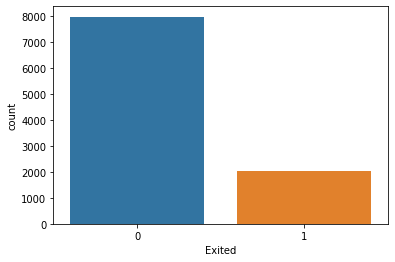

In [13]:
# imbalanced data
sns.countplot(x = 'Exited', data = df)

It turns out that the ratio between the 2 classes in the target variable is very imbalanced. (4:1)

In [14]:
# Check numerical features
df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


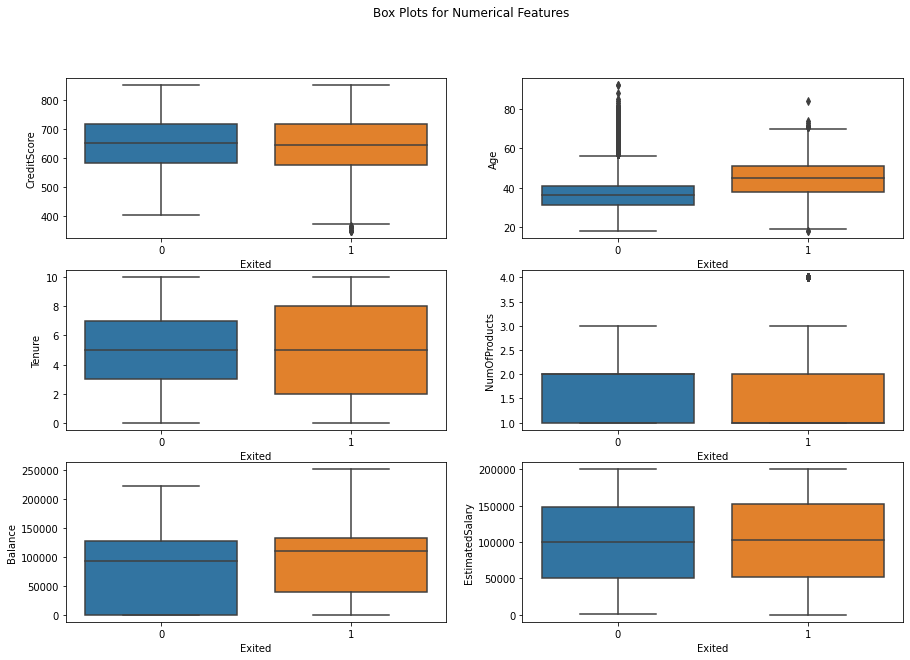

In [22]:
# making box plots
fig,axs = plt.subplots(3,2, figsize=[15,10])
fig.suptitle('Box Plots for Numerical Features')
sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axs[0][0])
sns.boxplot(x='Exited', y ='Age', data=df, ax=axs[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axs[1][0])
sns.boxplot(x='Exited', y ='NumOfProducts', data=df, ax=axs[1][1])
sns.boxplot(x='Exited', y ='Balance', data=df, ax=axs[2][0])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axs[2][1])

`CreditScore`, `NumOfProducts`, `EstimatedSalary` don't seem to be vary too much given different churn status. However, we can see that there are some outliers for churned customer who purchased 4 number of products from the banks.

Moreover, as compared to royal customer, the group of people who chose to exit has a higher average age, approximately 50. 

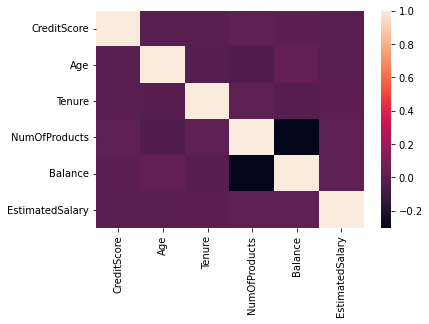

In [19]:
# correlations between features
correlation = df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(correlation)

In [26]:
correlation

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


It turns out that there are only weak correlation (negligible) shown between our numerical features. `Balance` and `NumOfProducts` have a relatively significant correlation of negative 0.3. 

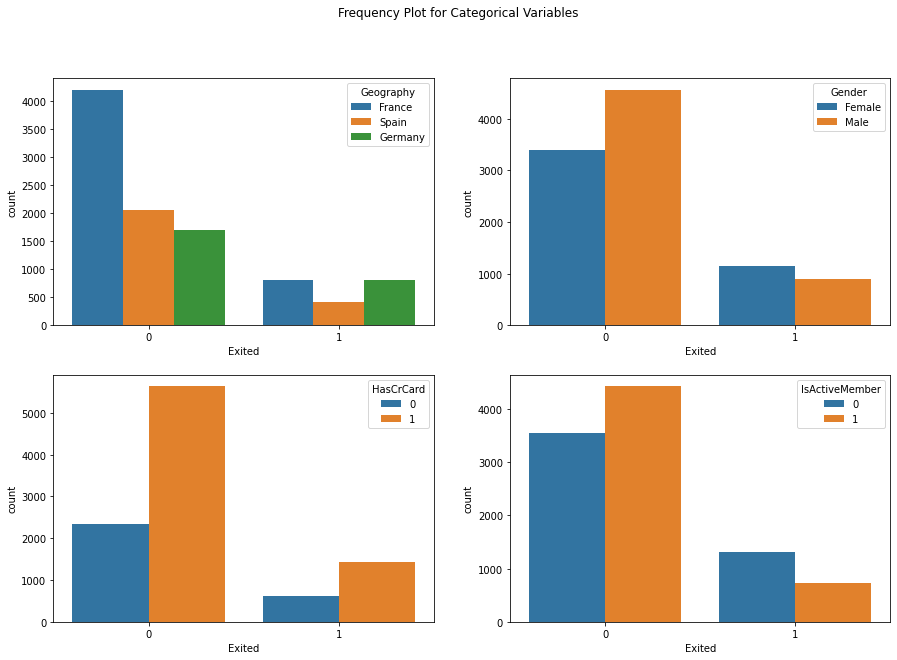

In [23]:
# Check categorical features
fig,axs = plt.subplots(2,2, figsize=[15,10])
fig.suptitle('Frequency Plot for Categorical Variables')
sns.countplot(x='Exited', hue='Geography', data=df, ax=axs[0][0])
sns.countplot(x='Exited', hue='Gender', data=df, ax=axs[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axs[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axs[1][1])

If we consider the portion of churned customers within coutries, it shows that Germany did a bad job in maintaining customer retention. 

`IsActiveMember` also seems to have influence on churn status. It looks like active members tend to stay as compared to those who are not active members.

## Part 2: Feature Engineering

In [27]:
X = df.drop(['RowNumber','CustomerId','Surname','Exited'], axis = 1)

In [28]:
X.dtypes

Unnamed: 0           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

### 2.1 Split the Data

In [63]:
# Splite data into training and testing
# train set: test set = 0.75 : 0.25

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 11 features
test data has 2500 observation with 11 features


### 2.2 Transform Features

In [64]:
# Transform categorical features
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), 
                             columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

# only `Geography` is not binary factor
categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [65]:
# Ordinal encoding for binary factor
# only `Gender` needs to be numericalized
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [66]:
X_train.head()

,Unnamed: 0,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,7971,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,9152,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,6732,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,902,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,2996,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [68]:
# Transform numerical features (standardization)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

scaler.fit(X_train[numerical])
X_train[numerical] = scaler.transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

In [69]:
X_train.head()

,Unnamed: 0,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,1.037120,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,1.448111,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,0.605944,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-1.422913,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,-0.694195,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


### 2.3 Oversampling (SMOTE)

In [70]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42, k_neighbors = 5)

In [71]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

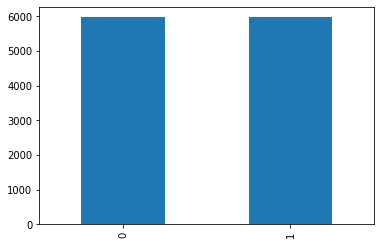

In [84]:
pd.Series(y_train_new).value_counts().plot.bar()

Now, we have a balanced training dataset.

## Part 3: Modeling

### 3.1 Training Model

In [85]:
# model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

In [88]:
# Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# K Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
# Use 5-fold Cross Validation to get the accuracy for our models
names_list = ['Logistic Regression','KNN','Random Forest']
model_list = [logistic, KNN, RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(names_list[count] + ' has mean accuracy of  ' + str(cv_score.mean()))
    count += 1

Logistic Regression has mean accuracy of  0.8122666666666666
KNN has mean accuracy of  0.8328
Random Forest has mean accuracy of  0.8629333333333333


### 3.2 Tunning Hyperparameter

In [94]:
from sklearn.model_selection import GridSearchCV

In [104]:
def print_gcv_res(gcv_model):
  print("Best estimator: ", gcv_model.best_estimator_)
  print("Best parameter set: ", gcv_model.best_params_)
  print("Best score: ", gcv_model.best_score_)

In [95]:
# Logistic Regression
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.1, 0.35,  0.5, 1)
}

LR_gcv = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=5)
LR_gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.1, 0.35, 0.5, 1),
                         'penalty': ('l1', 'l2')})

In [109]:
# KNN
parameters = {
    'n_neighbors':[1,3,5,7,9]
}

KNN_gcv = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
KNN_gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [110]:
# Random Forest
parameters = {
    'n_estimators' : [50,75,100, 125],
    'max_depth': [1,3,5,7]
}

RF_gcv = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
RF_gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100, 125]})

In [113]:
model_list = [LR_gcv, KNN_gcv, RF_gcv]
count = 0

for classifier in model_list:
  print(names_list[count], ": \n")
  print_gcv_res(classifier)
  print("\n")
  count += 1

Logistic Regression : 

Best estimator:  LogisticRegression(C=0.1, solver='liblinear')
Best parameter set:  {'C': 0.1, 'penalty': 'l2'}
Best score:  0.8129333333333333


KNN : 

Best estimator:  KNeighborsClassifier(n_neighbors=9)
Best parameter set:  {'n_neighbors': 9}
Best score:  0.8394666666666666


Random Forest : 

Best estimator:  RandomForestClassifier(max_depth=7)
Best parameter set:  {'max_depth': 7, 'n_estimators': 100}
Best score:  0.8603999999999999




### Evaluation

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [115]:
def cal_metrics(cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
  precision = tp / (tp + fp + 0.0)
  recall = tp / (tp + fn + 0.0)
  f1_score = 2*precision*recall/ (precision + recall)
  return accuracy, precision, recall, f1_score

In [119]:
cal_metrics(confusion_matrix(y_test, LR_gcv.best_estimator_.predict(X_test)))

(0.8076, 0.5833333333333334, 0.1925343811394892, 0.28951255539143284)

In [122]:
model_list = [LR_gcv.best_estimator_, KNN_gcv.best_estimator_, RF_gcv.best_estimator_]
count = 0

for classifier in model_list:
  print(names_list[count], ": \n")
  a, p, r, f1 = cal_metrics(confusion_matrix(y_test, classifier.predict(X_test)))
  print("accuracy: ", a)
  print("precision: ", p)
  print("recall: ", r)
  print("f1-score: ", f1)
  print("\n")
  count += 1

Logistic Regression : 

accuracy:  0.8076
precision:  0.5833333333333334
recall:  0.1925343811394892
f1-score:  0.28951255539143284


KNN : 

accuracy:  0.8344
precision:  0.698744769874477
recall:  0.3280943025540275
f1-score:  0.44652406417112306


Random Forest : 

accuracy:  0.8552
precision:  0.8356164383561644
recall:  0.35952848722986247
f1-score:  0.5027472527472527




In [129]:
# see the mean f1-score for each models (using 5-fold cv)
count = 0
for classifier in model_list:
  print(names_list[count], ": \n")
  f1 = model_selection.cross_val_score(model_list[count], X_train, y_train, cv=5, scoring = "f1")
  print(np.mean(f1))
  print("\n")
  count += 1


Logistic Regression : 

0.32203700700699184


KNN : 

0.47737473481243303


Random Forest : 

0.5201352952709172




It turns out that `Random Forest` outperforms `Logistic Regression` and `K-Nearest Neighbors` in terms of f1-score.

In [123]:
# Check the ROC
from sklearn.metrics import roc_curve
from sklearn import metrics

In [136]:
# Use predict_proba to get the probability results of Random Forest
y_pred = RF_gcv.best_estimator_.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)

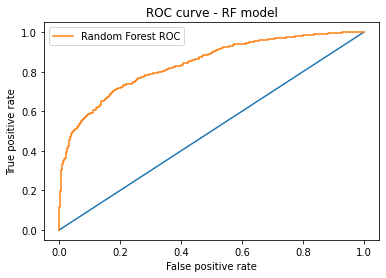

In [137]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

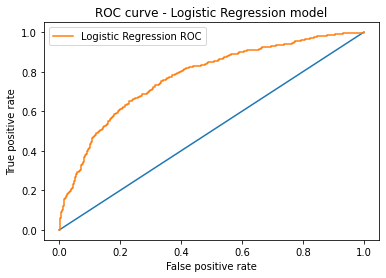

In [140]:
y_pred = LR_gcv.best_estimator_.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Logistic Regression model')
plt.legend(loc='best')
plt.show()

It looks like the ROC of random forest is more steep than the one of logistic regression. Let's check the AUC as well.

In [141]:
# AUC scores
print("Random Forest: ", metrics.auc(fpr_rf,tpr_rf))
print("Logistic Regression: ", metrics.auc(fpr_lr,tpr_lr))

Random Forest:  0.8398391978046592
Logistic Regression:  0.7724662750550364


We can see random forest has a higher AUC scores. Now, we confirm that given all the evaluation results, random forest is indeed the best among many of our training models.

## Part 4: Feature Importance Analysis


In [151]:
importances = RF_gcv.best_estimator_.feature_importances_
importances_normalized = importances/sum(importances)

Text(0.5, 1.0, 'Normalized Importance of Features')

<Figure size 432x288 with 0 Axes>

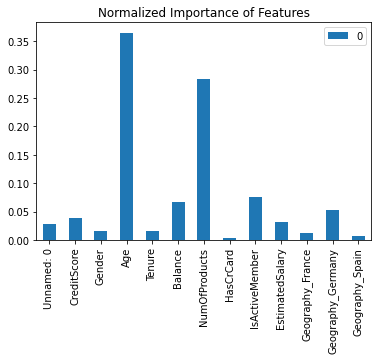

In [177]:
plt.figure()
pd.DataFrame(importances_normalized, index = X_test.columns).plot.bar()
plt.title('Normalized Importance of Features')